## **SCRIPT DESCRIPTION**

The purpose of this script is to process raw data for statistical analysis in R, and to visualize processed data.

Six wastewater treatment plants (wwtps):
1. Palo Alto, "PA".
2. Sunny Vale, "SV"
3. Duck Creek, "DC"
4. Garland Rowlett, "GR"
5. RM Clayton Water, "RM"
6. South River, "SR"

Two seasons:
1. Season 1 (Nov 2021-Feb 2022), "s1"
2. Season 2 (Nov 2022-Feb 2023), "s2"

Three areas:
1. Santa Clara County, California: PA & SV
2. Dallas, Texas: DC & GR
3. Atlanta, GA: RM & SR

Two RSV subtypes monitored:
1. A
2. B

------------------------------------------------------------------------------
The raw data is separated in two main spreadsheets and one additional spreadsheet:
1. Results_A: Contains results for subtype A for all wwwtps and both seasons.
2. Results_B: Contains results for subtype B for all wwwtps and both seasons.
3. Results_PMMoV: Contains additional results for manuscript development.

****THE RAW DATA IS NOT PROVIDED****

The original raw data was stored in a Google Drive.  
The code below demonstrates how the data was loaded, but the links to the documents are not included.  
Sheet IDs and names have been replaced with placeholders ('xxx').  
While this code cannot be directly executed without the raw data, it is provided for illustrative purposes.  

------------------------------------------------------------------------------


## **PACKAGES**

In [ ]:
#Load packages

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# **FUNCTIONS**

## **FUNCTIONS: Data Preparation**

In [ ]:
#DATA CLEANING FUNCTION: convert data to appropiate format

def dftoformat(df):
  """
  This function performs 3 main data cleaning steps from raw data:
      1. Converts sample concentration columns 'gc_g', 'uci_gc_g', and 'lci_gc_g' to numeric.
      2. Converts sample wastewater treatment plant name 'wwtp' to string.
      3. Converts sample 'date' column to a timestamp.

      Args:
          df: The input dataframe to be cleaned

      Returns:
          df: A cleaned dataframe
  """
  for col in df.columns:
        if col in ['gc_g', 'uci_gc_g', 'lci_gc_g']:
            df[col] = df[col].str.replace(',', '').astype(float) #Remove the commas
            df[col] = pd.to_numeric(df[col]) #Convert concentrations to numeric
        elif col in ['wwtp']:
            df[col] = df[col].astype(str) #Convert wwtp plant name to string
        elif col in ['date']:
            df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert 'date' column to a timestamp
        else:
            # No action in the else block
            pass
  return df

In [ ]:
#DATA ORGANZATION FUNCTION: create subdataframes for one wwtp, per season, per subtype

def wwtp_season_subtypedf(df,wwtp_name,season_name,subtype):
  """
  This function performs 2 main data organizations steps from a cleaned dataframe:
      1. Assings "Season 1" for samples taken between Nov 2021-Feb 2022 and "Season 2" for samples taken between Nov 2022-Feb 2023.
      2. Creates a subdataframe that contains the results for one wastewater treatment plant, in one season, for a specific subtype.

      Args:
          df: A cleaned dataframe (df)
          wwtp_name: Name of wastewater treatment plant (str)
          season_name: Name of season (i.e., s1 or s2) (str)
          subtype: Name of subtype (i.e., A or B) (str)

      Returns:
          df_name: A dataframe for a single wastewater treatment plant, for one season, for a specific subtype (e.g., Results for Palo Alto wwtp in Season 1 for RSV A)
  """
  wwtp_name = wwtp_name.upper() #Change to upper case to match spreadsheet
  season_name = season_name.lower() #Change to upper case to match spreadsheet
  subtype = subtype.upper()  #Change to upper case to match spreadsheet

  #sorting the data
  sorted_df = df.sort_values('date', ascending=True)

  #Assign dates for Seasons

  #Season1: November 15th, 2021 to February 28, 2022
  date_start_s1 = pd.to_datetime('2021-11-1')  # Specify the start date
  date_end_s1 = pd.to_datetime('2022-2-28')  # Specify the end date

  #Season2: November 1st, 2022 to February 28, 2023
  date_start_s2 = pd.to_datetime('2022-11-1')  # Specify the start date
  date_end_s2 = pd.to_datetime('2023-2-28')  # Specify the end date

  if season_name == 's1':
      df_new = sorted_df[(sorted_df['wwtp'] == wwtp_name)] #Filter by wwtp
      df_new = df_new[(df_new['date'] >= date_start_s1) & (df_new['date'] <= date_end_s1)] #filter by season date
  elif season_name == 's2':
      df_new = sorted_df[(sorted_df['wwtp'] == wwtp_name)] #Filter by wwtp
      df_new = df_new[(df_new['date'] >= date_start_s2) & (df_new['date'] <= date_end_s2)] #filter by season date

  #Create a new df with the wwtp name, season number, and subtype
  df_name = f"{wwtp_name}_{season_name}_{subtype}"  # Combine the strings to create the dataframe name
  globals()[df_name] = df_new  # Assign the dataframe to the name created from the strings
  return df_name


In [ ]:
#DATA ORGANZATION FUNCTION: create subdataframes for one wwtp, per season number, for both subtypes

def wwtp_seasondf(df_A,df_B,wwtp_name,season_name):

  """
    This function performs 3 main data organizations steps from two cleaned dataframes:
        1. Extract parameters from both dataframes and combines them into a single dataframe.
        2. Calculates the 'Proportion' of subtype A in the sample.
        3. Concatenates other important parameters for general manuscript development (e.g., Sample recovery percentage, PMMoV concentration).

        Args:
            df_A: A cleaned dataframe containing data from subtype A for one wwtp and one season (df) [obtained using wwtp_season_subtypedf function]
            df_B: A cleaned dataframe containing data from subtype B for one wwtp and one seasons (df) [obtained using wwtp_season_subtypedf function]
            wwtp_name: Name of wastewater treatment plant (str)
            season_name: Name of season (i.e., s1 or s2) (str)

        Returns:
            df_name: A dataframe for a single wastewater treatment plant, for one season, for both subtypes (e.g., Results for Palo Alto wwtp in Season 1 for RSV A and B)
    """

  #Extract parameters from both dataframes and combine them into a single dataframe
  df_new = pd.DataFrame({
        'Date': df_A['date'], #Sample date
        'A': df_A['gc_g'], #Subtype A concentration
        'A_u': df_A['uci_gc_g'], #Subtype A concentration upper limit
        'A_l': df_A['lci_gc_g'], #Subtype A concentration lower limit
        'B': df_B['gc_g'], #Subtype B concentration
        'B_u': df_B['uci_gc_g'], #Subtype B concentration upper limit
        'B_l': df_B['lci_gc_g'], #Subtype B concentration lower limit
        'Total': df_A['gc_g'] + df_B['gc_g'], #Calculate Total of both subtypes in sample
        'Proportion': df_A['gc_g']/(df_A['gc_g'] + df_B['gc_g']), #Calculate Proportion of subtype A in sample
        'wwtp':df_A['wwtp'], #Wastewater treatment plant name
        'original_rsv':df_A['original_rsv_gc_g'], #Original Total concentration from previous experiments
        'Season':season_name, #Season name
        'original_pmmov':df_A['original_pmmov_gc_g'], #Pepper mild mottle virus (PMMoV) concentration for sample
        'original_recovery':df_A['original_recovery'] #Sample Recovery
        })

  df_new = df_new.dropna(subset=['Proportion']) #Removes NaN rows
  df_new['wwtp'] = df_new['wwtp'].astype('category') #Converts wwtp name to category

  #Create a new df with the wwtp name and season number
  df_name = f"{wwtp_name}_{season_name}"  # Combine the strings to create the dataframe name
  globals()[df_name] = df_new  # Assign the dataframe to the name created from the strings
  return df_name


In [ ]:
#DATA ORGANZATION FUNCTION: create subdataframes for one wwtp, for both seasons and both subtypes

def wwtp_df(df_s1,df_s2,wwtp_name):
  """
    This function performs 1 main data organization step from two cleaned dataframes:
        1. Concatenates two dataframes into one.

        Args:
            df_s1: A cleaned dataframe containing data from season 1 for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            df_s2: A cleaned dataframe containing data from season 2 for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            wwtp_name: Name of wastewater treatment plant (str)

        Returns:
            df_name: A dataframe for a single wastewater treatment plant, for both seasons and both subtypes (e.g., Results for Palo Alto wwtp in Season 1 and 2 for RSV A and B)
    """

  #Concatenating the dataframes
  df_new = pd.concat([df_s1, df_s2])

  #Create a new df with the wwtp name
  df_name = f"{wwtp_name}"  # Create the dataframe name
  globals()[df_name] = df_new  # Assign the dataframe to the name created from the strings
  return df_name


## **FUNCTIONS: Data Visualization**

In [ ]:
#PLOT FUNCTION: Concentrations vs time [2x2 plot]

def conc_timeplot_combined(df1_wwtp_season,title1, df2_wwtp_season,title2, df3_wwtp_season, title3, df4_wwtp_season,title4, figtitle):

    """
    This function performs 4 data visualization steps from 4 cleaned dataframes:
        1. Creates a concentration time series with error bars for subtype A for each dataframe.
        2. Creates a concentration time series with error bars for subtype B for each dataframe.
        3. Combines subtype A and B concentration time series into a single plot for each dataframe.
        4. Creates a 2x2 plot including all 4 time series.

        Args:
            df1_wwtp_season: A cleaned dataframe containing data from one season for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            title1: Individual plot title corresponding to df1 (str)
            df2_wwtp_season: A cleaned dataframe containing data from one season for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            title2: Individual plot title corresponding to df2 (str)
            df3_wwtp_season: A cleaned dataframe containing data from one season for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            title3: Individual plot title corresponding to df3 (str)
            df4_wwtp_season: A cleaned dataframe containing data from one season for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            title4: Individual plot title corresponding to df4 (str)
            figtitle: Figure title (st)
        Returns:
           None. Saves the figure to files as a 600 dpi png.
    """

    dfs = [df1_wwtp_season, df2_wwtp_season, df3_wwtp_season, df4_wwtp_season]
    plot_titles= [title1,title2,title3,title4]

    #Define colors
    color1 = '#393b79'
    color1_faded= '#9c9ede'
    color2 = '#637939'
    color2_faded= '#cedb9c'

    #Create the main figure and subplots
    fig, axes = plt.subplots(2, 2, figsize=(24, 12))

    #Create plot coordinates
    x_coordinate = [0,0,1,1]
    y_coordinate = [0,1,0,1]

    for i, df in enumerate(dfs):

        #Assign plot coordinates
        ax = axes[x_coordinate[i],y_coordinate[i]]

        #Create the scatter plot
        sns.scatterplot(x='Date', y='A', data=df, label='A', color=color1_faded, ax=ax, s=50)
        ax.errorbar(df['Date'], df['A'], yerr=[df['A'] - df['A_l'], df['A_u'] - df['A']],
                    fmt='',ecolor=color1_faded,linewidth=1, capsize=1.5, capthick=0.3, ls='none')

        sns.scatterplot(x='Date', y='B', data=df, label='B', color=color2_faded, marker='s', ax=ax,s=50)
        ax.errorbar(df['Date'], df['B'], yerr=[df['B'] - df['B_l'], df['B_u'] - df['B']],
                    fmt='',ecolor=color2_faded,linewidth=1, capsize=1.5, capthick=0.3, ls='none')

        #Add lines connecting the points
        ax.plot(df['Date'], df['A'], marker='', linestyle='--', color=color1,linewidth=2)
        ax.plot(df['Date'], df['B'], marker='', linestyle='--', color=color2,linewidth=2)

        #Set tick label font size
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.tick_params(axis='x', labelsize=16, rotation=10) #Rotate x-axis labels by 10 degrees

        #Set axis labels
        ax.set_ylabel('Concentrations (gc/g)', fontsize=16)
        ax.set_xlabel('', fontsize=16)

        #Set y-axis ticks to scientific notation
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True,useLocale=True))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

       #Set the font size of the exponent
        ax.yaxis.offsetText.set_fontsize(14) #Adjust the font size as needed

        #Get the legend object
        legend = ax.legend()

        #Set the font size of the legend
        for text in legend.get_texts():
            text.set_fontsize(14) #Adjust the font size as needed

        #Reduce number of tick marks and labels on the x-axis
        ax.xaxis.set_major_locator(plt.MaxNLocator(5)) #Show only 5 major tick marks

        #Add title
        ax.set_title(plot_titles[i], loc='center', fontsize=16)

 #Save figure
    plt.savefig(figtitle + ".png", dpi=600)  #Save to a file with the specified name
    plt.show()


In [ ]:
#PLOT FUNCTION: Proportion vs time [2x2 plot]

def proprtion_timeplot_combined(df1_wwtp_season,title1, df2_wwtp_season,title2, df3_wwtp_season, title3, df4_wwtp_season,title4, figtitle):

    """
    This function performs 3 data visualization steps from 4 cleaned dataframes:
        1. Creates a proportion of subtype A time series in a single plot for each dataframe.
        3. Adds a horizontal line at y=0.5 for each plot.
        2. Creates a 2x2 plot including all 4 time series.

        Args:
            df1_wwtp_season: A cleaned dataframe containing data from one season for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            title1: Individual plot title corresponding to df1 (str)
            df2_wwtp_season: A cleaned dataframe containing data from one season for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            title2: Individual plot title corresponding to df2 (str)
            df3_wwtp_season: A cleaned dataframe containing data from one season for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            title3: Individual plot title corresponding to df3 (str)
            df4_wwtp_season: A cleaned dataframe containing data from one season for one wwtp and both subtypes (df) [obtained using wwtp_seasondf function]
            title4: Individual plot title corresponding to df4 (str)
            figtitle: Figure title (st)
        Returns:
           None. Saves the figure to files as a 600 dpi png.
    """

    dfs = [df1_wwtp_season, df2_wwtp_season, df3_wwtp_season, df4_wwtp_season]
    plot_titles= [title1,title2,title3,title4]

    #Defining colors
    color1 = '#393b79'
    color1_faded= '#9c9ede'
    color_line = '#35193e'

    #Create the main figure and subplots
    fig, axes = plt.subplots(2, 2, figsize=(24, 12))

    #Create plot coordinates
    x_coordinate = [0,0,1,1]
    y_coordinate = [0,1,0,1]

    for i, df in enumerate(dfs):

        #Assign plot coordinates
        ax = axes[x_coordinate[i],y_coordinate[i]]

        #Create the scatter plot
        sns.scatterplot(x='Date', y='Proportion', data=df, label='Proportion', color=color1_faded, ax=ax, s=50, legend=False)

        #Add lines connecting the points
        ax.plot(df['Date'], df['Proportion'], marker='', linestyle='--', color=color1,linewidth=2)

        #Add horizontal line to scatterplot
        ax.axhline(y=0.5, linestyle='dotted', color = color_line, linewidth=1.5)

        #Set tick label font size
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.tick_params(axis='x', labelsize=16, rotation=10) #Rotate x-axis labels by 10 degrees

        #Set axis labels with increased fontsize
        ax.set_ylabel('Proportion of RSV A to Total RSV', fontsize=16)
        ax.set_xlabel('', fontsize=16)

        #Reduce number of tick marks and labels on the x-axis
        ax.xaxis.set_major_locator(plt.MaxNLocator(5)) #Show only 5 major tick marks

        #Add title
        ax.set_title(plot_titles[i], loc='center',fontsize=16)

 #Save figure
    plt.savefig(figtitle + ".png", dpi=600) #Save to a file with the specified name
    plt.show()


In [ ]:
#PLOT FUNCTION: BOX PLOT - Proportion by wwtp and season

def boxplot_wwtp_season(df, x_variable, figtitle):

    """
    This function performs 3 data visualization steps from a cleaned dataframes:
        1. Creates a box plot for each wastewater treatment plant.
        3. Creates a swarmplot for each wastewater treatment plant.
        2. Creates a single figure including all 4 box plot separated by season.

        Args:
            df: A cleaned dataframe containing data from both seasons for all wwtps (df)
            x_variable: Name of the column that represents the x-variable in df (st)
            figtitle: Figure title (st)
        Returns:
           None. Saves the figure to files as a 600 dpi png.
    """

    #Defining colors
    palette_plot = ['#9467bd', '#c5b0d5','#e377c2', '#f7b6d2']

    #Create the box plot and swarmplot
    ax = sns.boxplot(data=df, x=x_variable, y="Proportion",
                hue="wwtp", palette=palette_plot,
                linewidth = 0.8, fliersize=1)
    ax = sns.swarmplot(data=df, x=x_variable, y="Proportion",
                  hue="wwtp", palette=palette_plot, legend=False, dodge=True,
                  linewidth = 0.8, size = 3.5)

    #Set axis labels
    plt.ylabel('Proportion of RSV A/Total RSV')

    #Adding the number of samples to each box
    medians = df.groupby([x_variable, 'wwtp'])['Proportion'].median().values
    nobs = df.groupby([x_variable, 'wwtp']).size().values

    #Assign "n=" coordinates
    box_ycoordinates = [-0.2,0.20,0.8,1.20] #Hardcoded positions to visually differentiate seasons

    for i in range(len(medians)):
        ax.text(box_ycoordinates[i], -0.08, f'n= {nobs[i]}', ha='center', va='baseline',
                color='black',in_layout=True, wrap = True)

    #Adjust the y-axis limits to add white space at the bottom
    ax.set_ylim(-0.1, ax.get_ylim()[1]+0.1) #Adjust the 0.1 to set the desired amount of white space

    #Set the legend position
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

    #Save figure
    plt.savefig(figtitle + ".png", dpi=600) #Save to a file with the specified name
    plt.show()



In [ ]:
#PLOT FUNCTION: BOX PLOT - Proportion by area

def boxplot_area(df, x_variable, figtitle):

    """
    This function performs 3 data visualization steps from a cleaned dataframes:
        1. Creates a box plot for each area.
        3. Creates a swarmplot for each area.
        2. Creates a single figure including all 3 box plot.

        Args:
            df: A cleaned dataframe containing data from one season for all areas (df)
            x_variable: Name of the column that represents the x-variable in df (st)
            figtitle: Figure title (st)
        Returns:
           None. Saves the figure to files as a 600 dpi png.
    """

    #Defining colors
    palette_plot = ['#9467bd','#f7b6d2','#c7c7c7']

    #Create the box plot and swarmplot
    ax = sns.boxplot(data=df, x=x_variable, y="Proportion",
                palette=palette_plot,
                linewidth = 0.8, fliersize=1, width = 0.5)
    ax = sns.swarmplot(data=df, x=x_variable, y="Proportion",
                  palette=palette_plot, legend=False, dodge=False,
                  linewidth = 0.8, size = 3.5)

    #Set axis labels
    plt.ylabel('Proportion of RSV A/Total RSV')
    plt.xlabel('')

    #Adding the number of samples to each box
    medians = df.groupby([x_variable])['Proportion'].median().values
    nobs = df.groupby([x_variable]).size().values

    #Assign "n=" coordinates
    box_ycoordinates = [2,1, 0] #Hardcoded positions to visually differentiate areas

    for i in range(len(medians)):
        ax.text(box_ycoordinates[i], -0.08, f'n= {nobs[i]}', ha='center', va='baseline',
                color='black',in_layout=True, wrap = True)

    #Adjust the y-axis limits to add white space at the bottom
    ax.set_ylim(-0.1, ax.get_ylim()[1]+0.1) #Adjust the 0.1 to set the desired amount of white space

    #Save figure
    plt.savefig(figtitle + ".png", dpi=600) #Save to a file with the specified name
    plt.show()



# **LOADING RAW DATA**

In [ ]:
#Authorize google colab to scan your drive
from google.colab import auth
auth.authenticate_user()

#import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

#Load raw results data for subtype A
sheet_id_A = 'xxx'
sheet_name_A = 'xxx'
url_A = f'https://docs.google.com/spreadsheets/d/{sheet_id_A}/gviz/tq?tqx=out:csv&sheet={sheet_name_A}'

#Load raw results data for subtype B
sheet_id_B = 'xxx'
sheet_name_B = 'xxx'
url_B = f'https://docs.google.com/spreadsheets/d/{sheet_id_B}/gviz/tq?tqx=out:csv&sheet={sheet_name_B}'

#Load raw results data for PMMoV/additional parameters
sheet_id_pmmov = 'xxx'
sheet_name_pmmov = 'xxx'
url_pmmov = f'https://docs.google.com/spreadsheets/d/{sheet_id_pmmov}/gviz/tq?tqx=out:csv&sheet={sheet_name_pmmov}'


# **DATA PREPARATION**

## **DATA PREPARATION: Cleaning Data**

In [ ]:
"""
Using the 'dftoformat' function, we clean the raw data, and convert to appropiate formats.
These cleaned dataframes are then divided into multiple subdataframes.
"""

#Clean raw data for subtype A
data_A = pd.read_csv(url_A)
data_A = dftoformat(data_A)

#Clean raw data for subtype B
data_B = pd.read_csv(url_B)
data_B = dftoformat(data_B)

#Clean raw data for PMMoV/additional parameters
data_pmmov = pd.read_csv(url_pmmov)
data_pmmov = dftoformat(data_pmmov)

## **DATA PREPARATION: Subsetting for Analysis**

In [ ]:
#Creating sub-dataframes (wwtp, season, subtype)

"""
Using the 'wwtp_season_subtypedf' function, we generate 16 distinct sub-dataframes from the cleaned dataframes.
These sub-dataframes are then combined in various ways to support different analyses.
"""

#Palo Alto [Santa Clara County]
wwtp_season_subtypedf(data_A,'PA','s1','A') #Season 1, subtype A
wwtp_season_subtypedf(data_A,'PA','s2','A') #Season 2, subtype A
wwtp_season_subtypedf(data_B,'PA','s1','B') #Season 1, subtype B
wwtp_season_subtypedf(data_B,'PA','s2','B') #Season 2, subtype B

#Sunnyvale [Santa Clara County]
wwtp_season_subtypedf(data_A,'SV','s1','A') #Season 1, subtype A
wwtp_season_subtypedf(data_A,'SV','s2','A') #Season 2, subtype A
wwtp_season_subtypedf(data_B,'SV','s1','B') #Season 1, subtype B
wwtp_season_subtypedf(data_B,'SV','s2','B') #Season 2, subtype B

#Duck Creck [Texas]
wwtp_season_subtypedf(data_A,'DC','s2','A') #Season 2, subtype A
wwtp_season_subtypedf(data_B,'DC','s2','B') #Season 2, subtype B

#Garland Rowlett [Texas]
wwtp_season_subtypedf(data_A,'GR','s2','A') #Season 2, subtype A
wwtp_season_subtypedf(data_B,'GR','s2','B') #Season 2, subtype B

#RM Clayton Water [Georgia]
wwtp_season_subtypedf(data_A,'RM','s2','A') #Season 2, subtype A
wwtp_season_subtypedf(data_B,'RM','s2','B') #Season 2, subtype B

#South River [Georgia]
wwtp_season_subtypedf(data_A,'SR','s2','A') #Season 2, subtype A
wwtp_season_subtypedf(data_B,'SR','s2','B') #Season 2, subtype B

'SR_s2_B'

In [ ]:
#Combine subdataframes for time series plots

"""
Using the 'wwtp_seasondf' function, we create 8 distinct sub-dataframes from the previous sub-dataframes generated.
These sub-dataframes can be used in the time series plots (concentration vs time, proportion vs time)
"""

#Palo Alto [Santa Clara County]
wwtp_seasondf(PA_s1_A,PA_s1_B,'PA','s1') #Season 1, subtype A and B
wwtp_seasondf(PA_s2_A,PA_s2_B,'PA','s2') #Season 2, subtype A and B

#Sunnyvale [Santa Clara County]
wwtp_seasondf(SV_s1_A, SV_s1_B,'SV','s1') #Season 1, subtype A and B
wwtp_seasondf(SV_s2_A, SV_s2_B,'SV','s2') #Season 2, subtype A and B

#Duck Creck [Texas]
wwtp_seasondf(DC_s2_A, DC_s2_B,'DC','s2') #Season 2, subtype A and B

#Garland Rowlett [Texas]
wwtp_seasondf(GR_s2_A, GR_s2_B,'GR','s2') #Season 2, subtype A and B

#RM Clayton Water [Georgia]
wwtp_seasondf(RM_s2_A, RM_s2_B,'RM','s2') #Season 2, subtype A and B

#South River [Georgia]
wwtp_seasondf(SR_s2_A, SR_s2_B,'SR','s2') #Season 2, subtype A and B


In [ ]:
#Combine subdataframes for box plots

"""
Using the 'wwtp_df' function, we create 2 distinct sub-dataframes from the previous sub-dataframes generated.
These sub-dataframes can be used in the time series plots (concentration vs time, proportion vs time)
"""

#Palo Alto [Santa Clara County]
wwtp_df(PA_s1,PA_s2,'PA') #Season 1 and season 2, subtype A and B

#Sunnyvale [Santa Clara County]
wwtp_df(SV_s1,SV_s2,'SV') #Season 1 and season 2, subtype A and B

"""
Two subframes need to be generated for the the box plots:
1. Seasonal:Two seasons (Season 1 and Seaon 2)
2. Spatial: Three main areas (Santa Clara County, Dallas and Atlanta)
"""

#Seasonal dataframe: Combined subdataframes per season
PA_SV = pd.concat([PA, SV]) #Only PA and SV have two seasons
PA_SV['wwtp_season'] = PA_SV['wwtp'] + '_' +PA_SV['Season']

#Spatial dataframe: Combined subdataframes per area

#Santa Clara County, CA
PA_SV_s2_sanjose = pd.concat([PA_s2, SV_s2])
PA_SV_s2_sanjose['Area'] = 'Santa Clara County, CA'

#Dallas, TX
DC_GR_s2_dallas = pd.concat([DC_s2, GR_s2])
DC_GR_s2_dallas['Area'] = 'Dallas, TX'

#Atlanta, GA
RM_SR_s2_atlanta = pd.concat([RM_s2, SR_s2])
RM_SR_s2_atlanta['Area'] = 'Atlanta, GA'

spatial_df = pd.concat([PA_SV_s2_sanjose, DC_GR_s2_dallas,RM_SR_s2_atlanta]) #One dataframe with all three areas


# **EXPORTING PREPARED DATA FOR STASTICAL ANALYSIS**


In [ ]:
"""
The subdataframes created in previous steps will be stored into an xlsx file containing 4 sheets:
1. all_data: All data for both subtypes, both seasons, all wastewater treatment plants.
2. seasonal: Data only for those wastewater treatment plants that have data for both seasons.
3. spatial: Data only for those wastewater treatment plants in all areas within the same season.
4. all_data_pmmov: Data containing additional experiment parameters important for manuscript development.

"""

#All data: Subtypes A and B
PA_SV_s1_sanjose = pd.concat([PA_s1, SV_s1])
PA_SV_s1_sanjose['Area'] = 'Santa Clara County, CA' #Area had not been labeled in previous steps for Season 1

all_data_df = pd.concat([PA_SV_s1_sanjose, PA_SV_s2_sanjose,DC_GR_s2_dallas,RM_SR_s2_atlanta])
all_data_df['linear_rsv']= (all_data_df['A'] + all_data_df['B'])/all_data_df['original_rsv'] #Linear proportion of subtype A
all_data_df['log_rsv']= np.log10(all_data_df['linear_rsv']) #Logarithmic proportion of subtype A

#All data: PMMoV/additional parameters
all_data_pmmov_df = data_pmmov
all_data_pmmov_df['linear_pmmov']= ( all_data_pmmov_df['gc_g'])/all_data_pmmov_df['original_pmmov_gc_g']
all_data_pmmov_df['log_pmmov']= np.log10(all_data_pmmov_df['linear_pmmov'])

#Save as an xlsx file
with pd.ExcelWriter('dataframes_rsv_a_b.xlsx') as writer:
  all_data_df.to_excel(writer, sheet_name='all_data')
  PA_SV.to_excel(writer, sheet_name='seasonal')
  spatial_df.to_excel(writer, sheet_name='spatial')
  all_data_pmmov_df.to_excel(writer, sheet_name='all_data_pmmov')

# **DATA VISUALIZATION**



## **DATA VISUALIZATION: Concentration vs time plots**


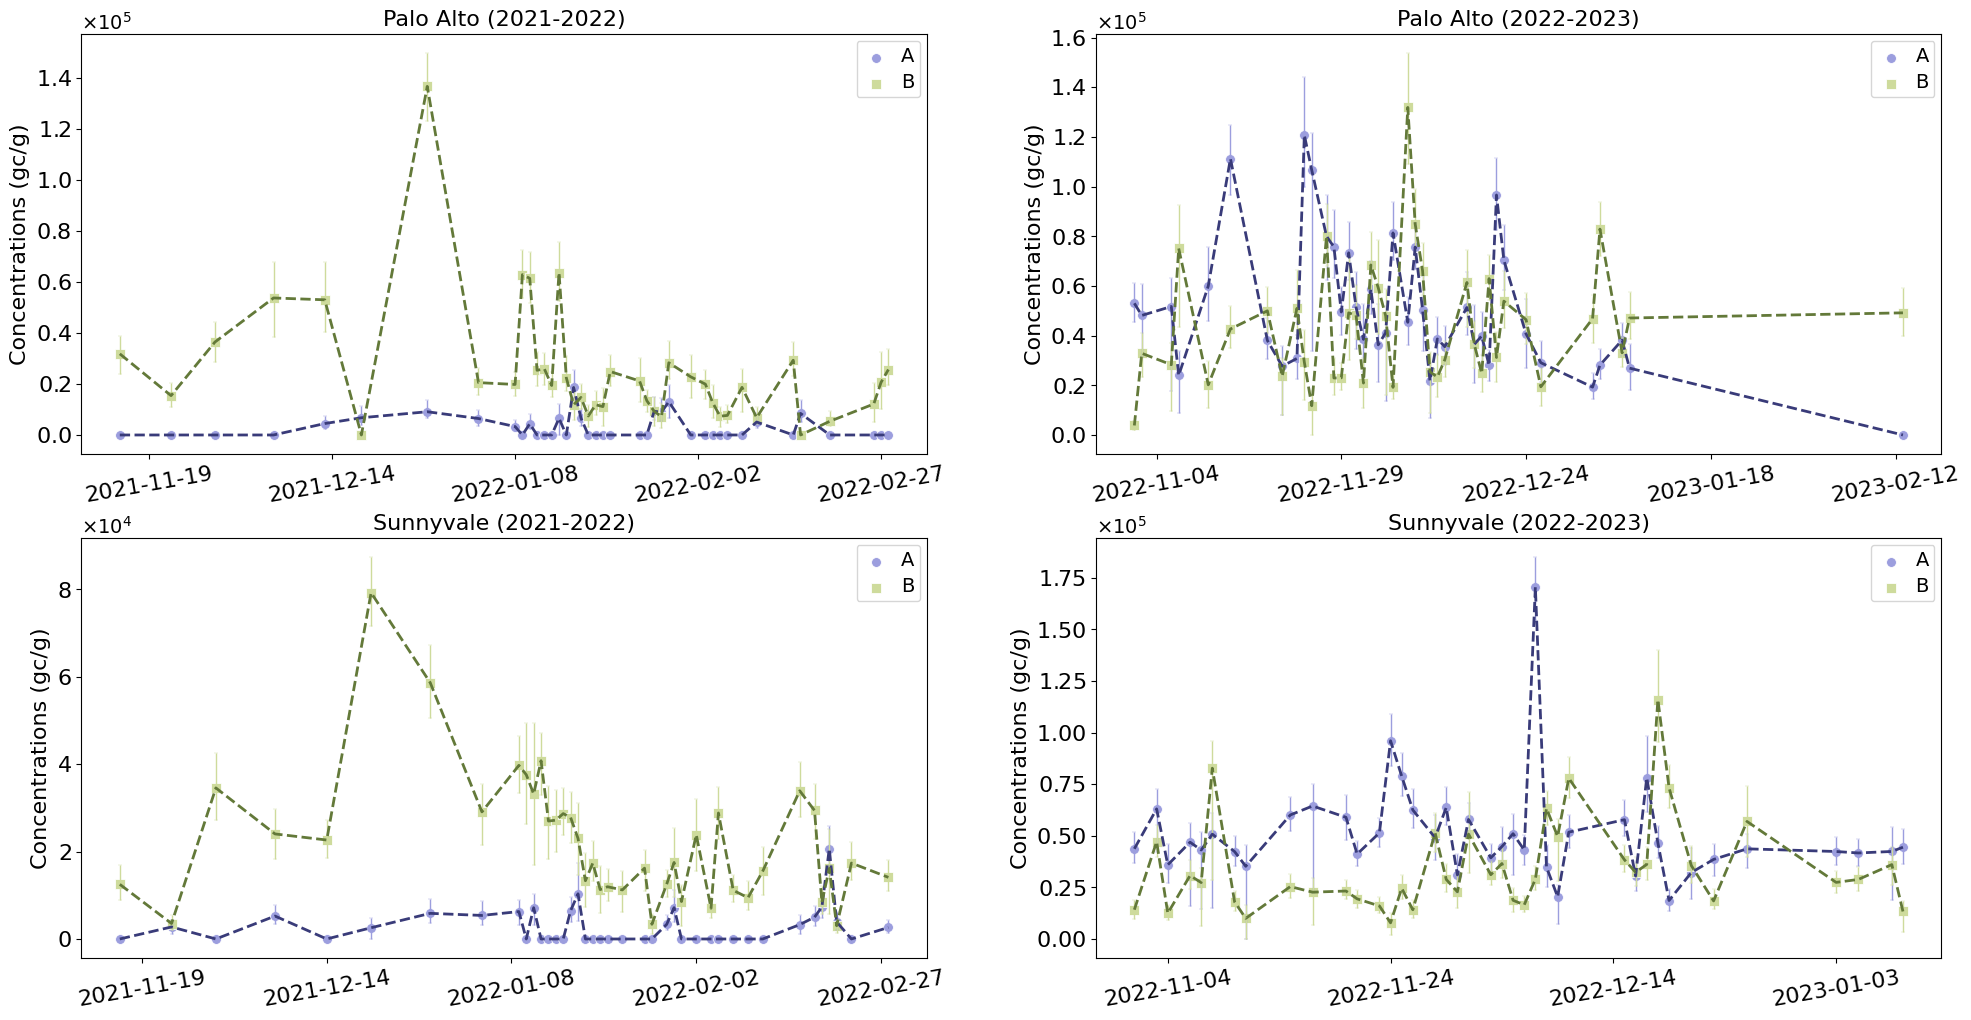

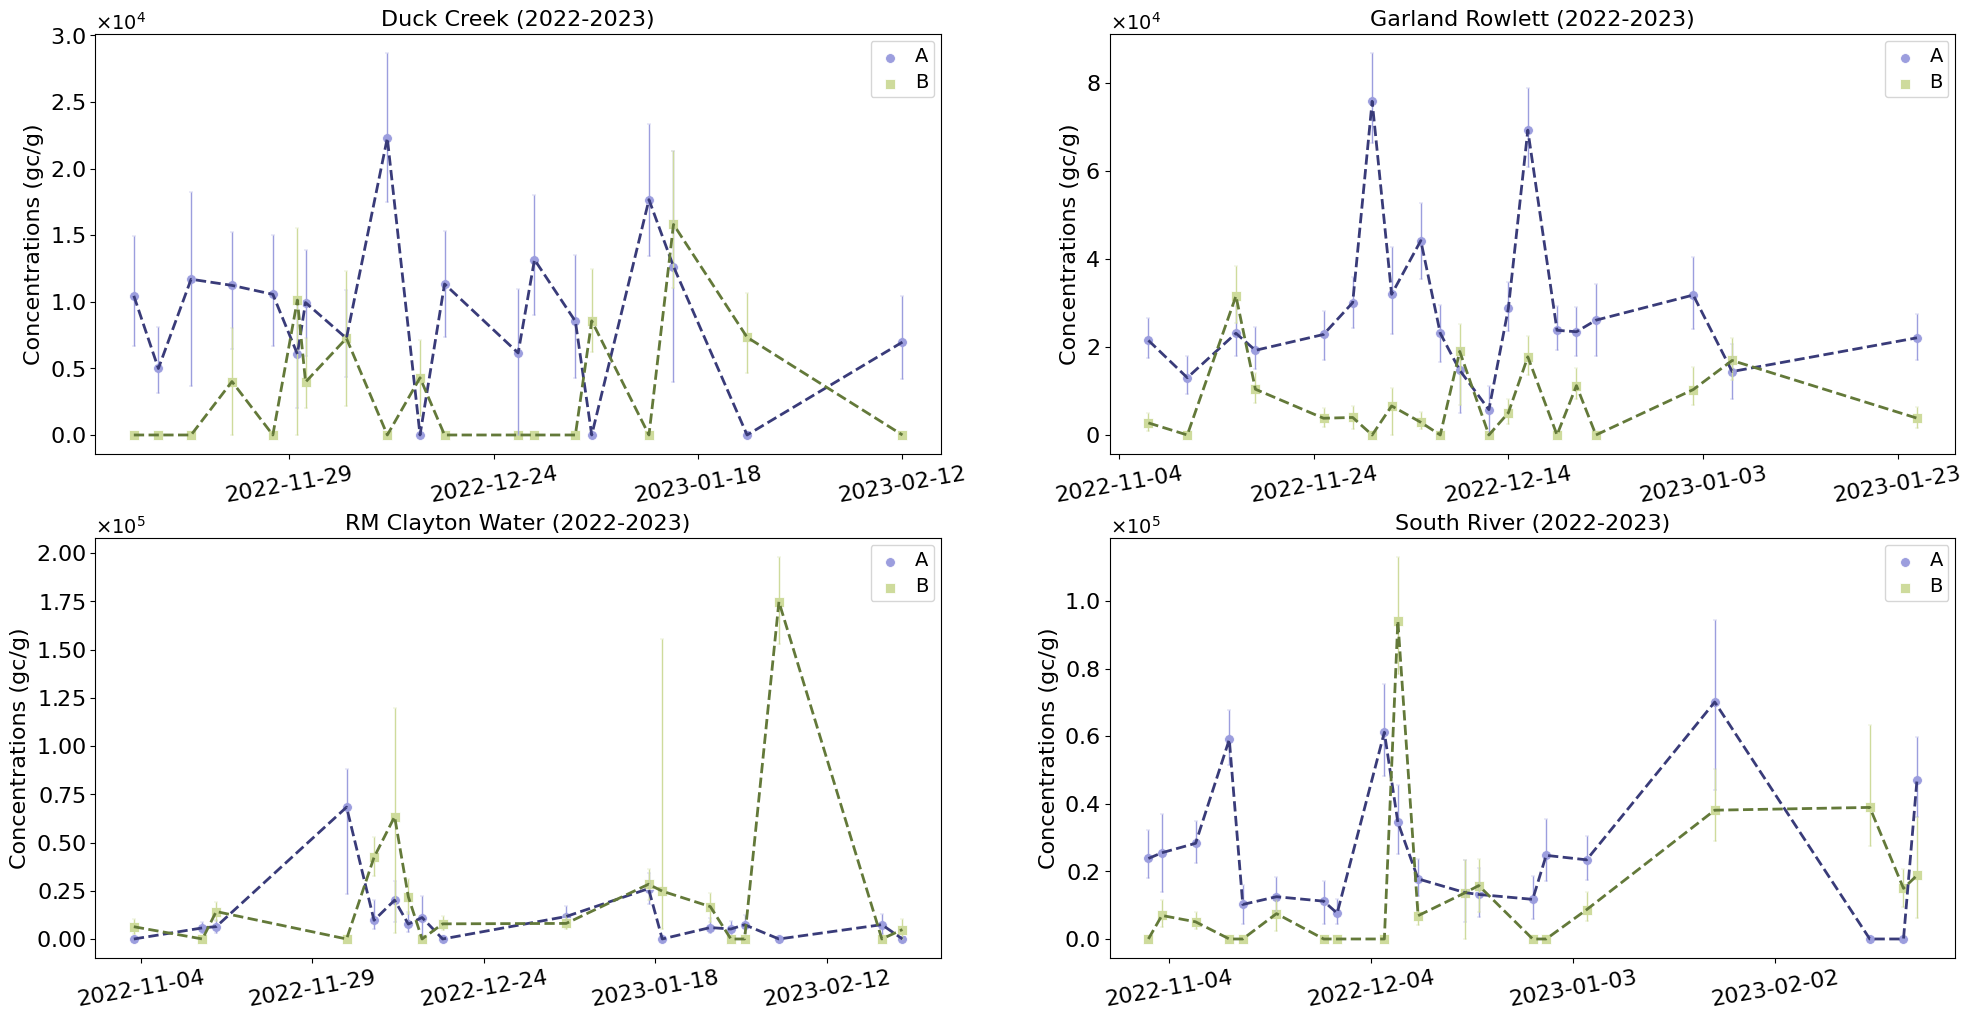

In [ ]:
#Create concentration vs time plots
"""
Eight concentration vs time plots will be generated:

1. Seasonal: Two seasons (Season 1 and Season 2)
  1.1 Palo Alto, Season 1, Subtype A and B
  1.2 Palo Alto, Season 2, Subtype A and B
  1.3 Sunnyvale, Season 1, Subtype A and B
  1.4 Sunnyvale, Season 2, Subtype A and B

2. Spatial: Three main areas (Santa Clara County, Dallas and Atlanta)
  2.1 Duck Creek, Season 2, Subtype A and B
  2.2 Garland Rowlett, Season 2, Subtype A and B
  2.3 RM Clayton Water, Season 2, Subtype A and B
  2.4 South River, Season 2, Subtype A and B
"""

#Seasonal Comparison
conc_timeplot_combined(PA_s1,'Palo Alto (2021-2022)',PA_s2, 'Palo Alto (2022-2023)', SV_s1,'Sunnyvale (2021-2022)', SV_s2, 'Sunnyvale (2022-2023)','Seasonal_Concentration')

#Spatial Comparison
conc_timeplot_combined(DC_s2,'Duck Creek (2022-2023)',GR_s2, 'Garland Rowlett (2022-2023)', RM_s2,'RM Clayton Water (2022-2023)', SR_s2, 'South River (2022-2023)','Spatial_Concentration')


## **DATA VISUALIZATION: Proportion vs time plots**


In [ ]:
#Create proportion vs time plots

"""
Eight proportion of subtype A vs time plots will be generated:

1. Seasonal: Two seasons (Season 1 and Season 2)
  1.1 Palo Alto, Season 1
  1.2 Palo Alto, Season 2
  1.3 Sunnyvale, Season 1
  1.4 Sunnyvale, Season 2

2. Spatial: Three main areas (Santa Clara County, Dallas and Atlanta)
  2.1 Duck Creek, Season 2
  2.2 Garland Rowlett, Season 2
  2.3 RM Clayton Water, Season 2
  2.4 South River, Season 2
"""

#Seasonal Comparison
proprtion_timeplot_combined(PA_s1,'Palo Alto (2021-2022)',PA_s2, 'Palo Alto (2022-2023)', SV_s1,'Sunnyvale (2021-2022)', SV_s2, 'Sunnyvale (2022-2023)','Seasonal_Proportion')

#Spatial Comparison
proprtion_timeplot_combined(DC_s2,'Duck Creek (2022-2023)',GR_s2, 'Garland Rowlett (2022-2023)', RM_s2,'RM Clayton Water (2022-2023)', SR_s2, 'South River (2022-2023)','Spatial_Proportion')


## **DATA VISUALIZATION: Proportion box plots**


In [ ]:
#Create proportion box plots
"""
Two box plots using proportion of subtype A as y-variable will be generated:

1. Seasonal: Two seasons (Season 1 and Season 2)
  1.1 Palo Alto, Season 1
  1.2 Palo Alto, Season 2
  1.3 Sunnyvale, Season 1
  1.4 Sunnyvale, Season 2

2. Spatial: Three main areas
  2.1 Santa Clara County, Season 2
  2.2 Dallas, Season 2
  2.3 Atlanta, Season 2
"""

#Seasonal Comparison
boxplot_wwtp_season(PA_SV, 'Season', 'Seasonal_Comparison')

#Spatial Comparison
boxplot_area(spatial_df, 'Area', 'Spatial_Comparison')